# Autocorrelation in Moving Average and Autoregressive Processes

This notebooks shows the graphs on pages 50-51 from Hamilton's _Time Series Analysis_, which show autocorrelation functions for moving-average (MA) and autoregressive (AR) processes.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt

/Users/mikemull/anaconda/envs/hamilton/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


The _jth_ autocorrelation of a covariance-stationary process (denoted &rho;<sub>j</sub>) is defined as the _jth_ autocovariance divided by the variance:

$$
Corr(Y_t, Y_{t-j}) = \frac{Cov(Y_t, Y_{t-j})}{\sqrt{Var(Y_t)}\sqrt{Var(Y_{t-j})}} = \frac{\gamma_y}{\sqrt{\gamma_0}\sqrt{\gamma_0}} = \rho_j
$$

The three graphs below are the autocorrelation functions for:
$$
Y_t = \epsilon_t
$$

$$
Y_t = \epsilon_t + 0.8\epsilon_{t-1}
$$
and
$$
Y_t = \epsilon_t - 0.6\epsilon_{t-1} + 0.3\epsilon_{t-2} -0.5\epsilon_{t-3} +0.5\epsilon_{t-1}
$$

__NOTE__: In the book, the small autocorrelations in the later lags are all zero.

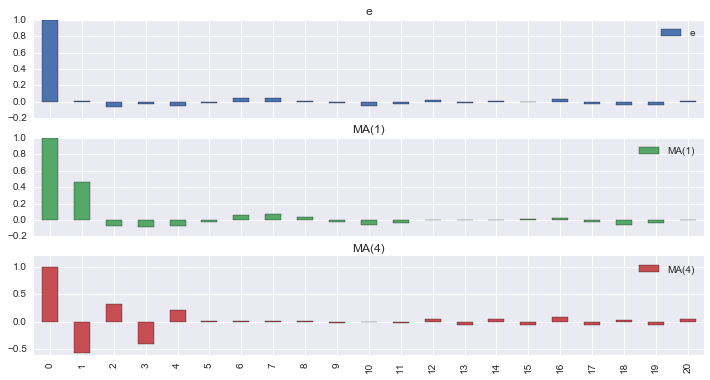

In [2]:
df = pd.DataFrame()
e = np.random.normal(0., 1., 1000)
df['e'] = smt.stattools.acf(e, nlags=20)
df['MA(1)'] = smt.stattools.acf(e[0:-1] + 0.8*e[1:], nlags=20)
df['MA(4)'] = smt.stattools.acf(e[0:-4] - 0.6*e[1:-3] + 0.3*e[2:-2] - 0.5 * e[3:-1] + 0.5 * e[4:] , nlags=20)
_ = df.plot(kind='bar', figsize=(12,6),subplots=(2, 2))

The graphs below show the autocorrelation functions for the two AR processes:

$$
Y_t = 0.8Y_{t-1} + \epsilon_t
$$
and
$$
Y_t = -0.8Y_{t-1} + \epsilon_t
$$

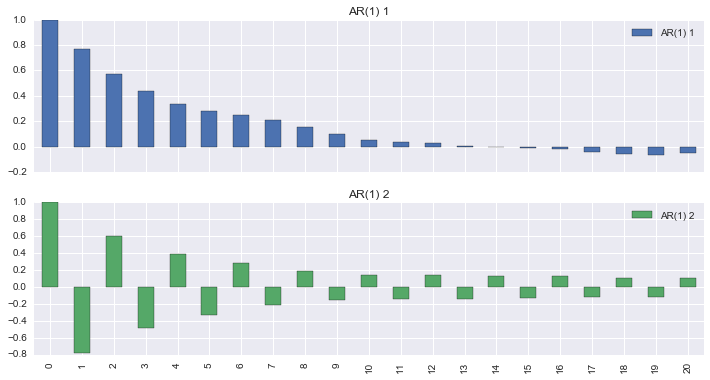

In [3]:
y = np.zeros(1000)
y[0] = e[0]
for i in range(1, 1000):
    y[i] = 0.8 * y[i-1] + e[i]

df['AR(1) 1'] = smt.stattools.acf(y, nlags=20)

for i in range(1, 1000):
    y[i] = -0.8 * y[i-1] + e[i]
    
df['AR(1) 2'] = smt.stattools.acf(y, nlags=20)
_ = df[['AR(1) 1', 'AR(1) 2']].plot(kind='bar', figsize=(12,6),subplots=(2, 2))

For an MA(1) process:

$$
Y_t = \mu + \epsilon_t + \theta\epsilon_{t-1}
$$

the 1st autocorrelation is defined by
$$
\rho_1 = \frac{\theta}{1 + \theta^2}
$$

(See Hamilton pg. 48 for details)

The graph below shows the value of the first autocorrelation (&rho;<sub>1</sub>) a range of values of theta from -3.0 to 3.0.  

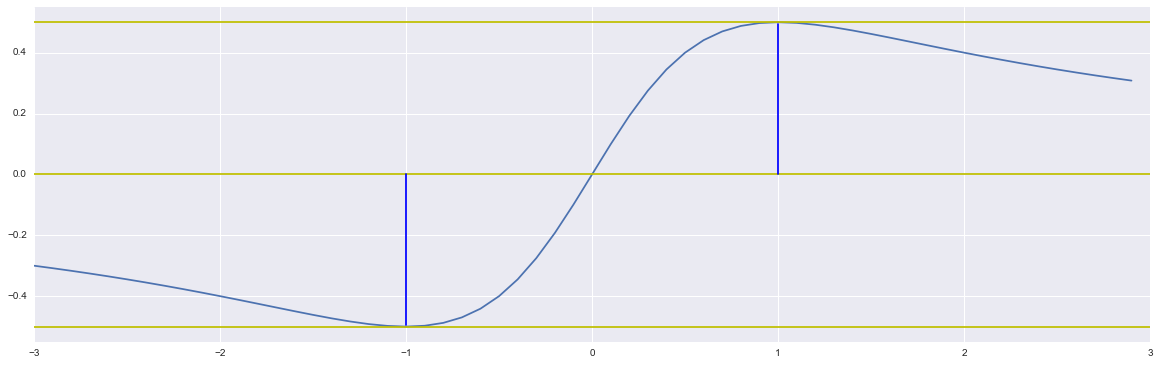

In [4]:
theta = np.arange(-3., 3., 0.1)
rho = [t / (t**2  + 1) for t in theta]

plt.figure(figsize=(20,6))
_=plt.plot(theta, rho)
_=plt.axis([-3., 3., 1.1 * np.amin(rho), 1.1 * np.amax(rho)])
_=plt.axhline(0.5, color='y')
_=plt.axhline(0.0, color='y')
_=plt.axhline(-0.5, color='y')
_=plt.axvline(1.0, ymin=0.50, ymax=0.95)
_=plt.axvline(-1.0, ymin=0.50, ymax=0.05)